In [1]:
import pandas as pd
Healthcare_full = pd.read_csv("Healthcare.csv", sep=",", parse_dates=['Date'])
Healthcare_full.info()
import numpy as np
%matplotlib inline
import seaborn as sns
from datetime import datetime

Healthcare_full['D'] = Healthcare_full['Date'.replace('-',' ')]






<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298 entries, 0 to 297
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     298 non-null    datetime64[ns]
 1   LLY      298 non-null    float64       
 2   UHS      298 non-null    float64       
 3   HCA      298 non-null    float64       
 4   JNJ      298 non-null    float64       
 5   UNH      298 non-null    float64       
 6   REGN     298 non-null    float64       
 7   Average  298 non-null    float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 18.8 KB


In [2]:
print(Healthcare_full.head(n=10))

        Date         LLY         UHS         HCA         JNJ         UNH  \
0 2020-01-02  127.145149  140.362961  144.257904  135.064743  283.774139   
1 2020-01-03  126.722015  140.027618  144.698029  133.501038  280.902496   
2 2020-01-06  127.193260  139.919144  145.245758  133.334473  282.852478   
3 2020-01-07  127.433678  140.481308  145.050156  134.148743  281.145050   
4 2020-01-08  128.587723  143.095062  146.008652  134.130249  287.072754   
5 2020-01-09  130.713058  142.355316  144.189423  134.528091  285.442871   
6 2020-01-10  132.713364  144.051804  144.893662  134.222748  286.325714   
7 2020-02-03  135.598450  135.382050  138.692612  138.950974  265.845489   
8 2020-02-04  137.944962  136.595245  141.206253  140.274139  272.462036   
9 2020-02-05  141.705200  140.057190  147.730087  142.485611  286.907867   

         REGN     Average          D  
0  373.350006  200.659150 2020-01-02  
1  369.160004  199.168533 2020-01-03  
2  371.739990  200.047517 2020-01-06  
3  373.

In [4]:
import matplotlib.pyplot as plt
date = Healthcare_full['Date']
LLY = Healthcare_full['LLY']
UHS = Healthcare_full['UHS']
HCA = Healthcare_full['HCA']
JNJ = Healthcare_full['JNJ']
UNH = Healthcare_full['UNH']
Average = Healthcare_full['Average']


<function matplotlib.pyplot.show(close=None, block=None)>

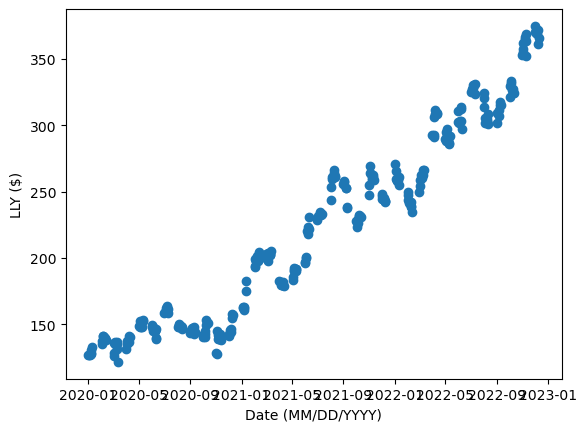

In [5]:
plt.scatter(date, LLY)
plt.xlabel('Date (MM/DD/YYYY)')
plt.ylabel('LLY ($)')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

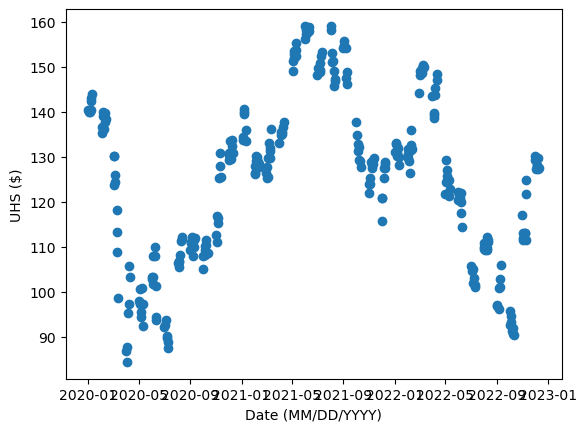

In [6]:
plt.scatter(date, UHS)
plt.xlabel('Date (MM/DD/YYYY)')
plt.ylabel('UHS ($)')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

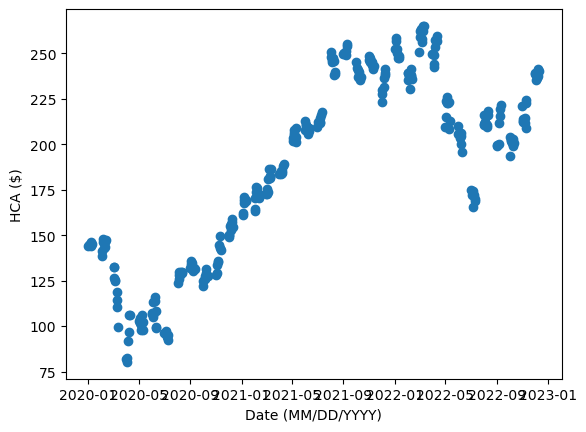

In [7]:
plt.scatter(date, HCA)
plt.xlabel('Date (MM/DD/YYYY)')
plt.ylabel('HCA ($)')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

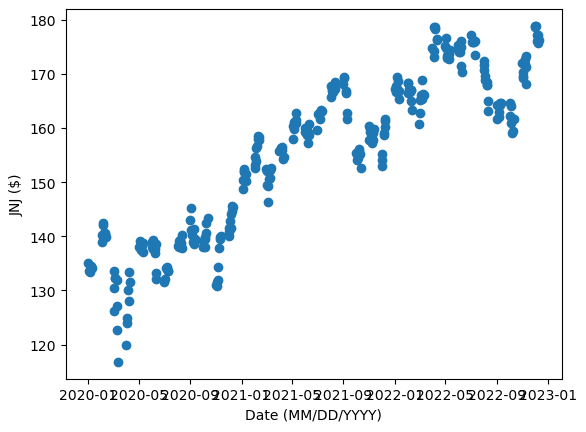

In [8]:
plt.scatter(date, JNJ)
plt.xlabel('Date (MM/DD/YYYY)')
plt.ylabel('JNJ ($)')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

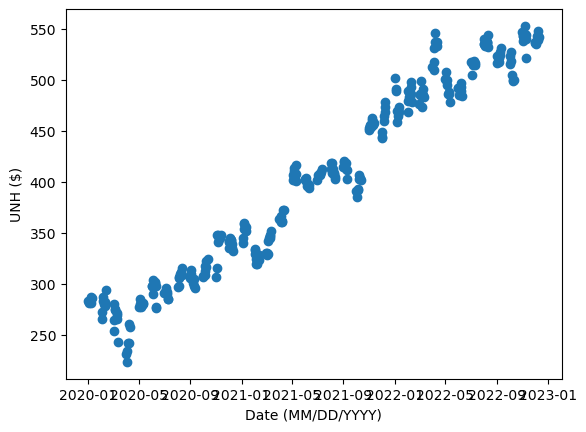

In [9]:
plt.scatter(date, UNH)
plt.xlabel('Date (MM/DD/YYYY)')
plt.ylabel('UNH ($)')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

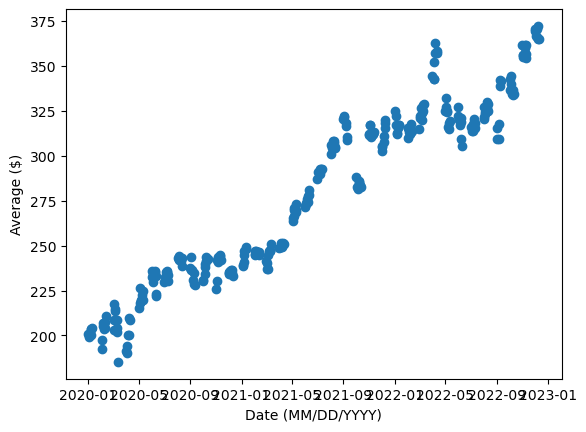

In [10]:
plt.scatter(date, Average)
plt.xlabel('Date (MM/DD/YYYY)')
plt.ylabel('Average ($)')
plt.show

In [11]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(Healthcare_full, 
                                        test_size=.2, random_state=123)
print('Train size: ', len(train_set), 'Test size: ', len(test_set))

Train size:  238 Test size:  60


In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import ElasticNet

power = 3
poly_process = PolynomialFeatures(degree=power, include_bias=False)


X = train_set[['Date']]
y = train_set['Average']
X_poly = poly_process.fit_transform(X)

X_test = test_set[['Date']]
y_test = test_set['Average']
X_poly_test = poly_process.fit_transform(X_test)

lr_model = LinearRegression()
lr_model.fit(X_poly,y)

y_pred = lr_model.predict(X_poly)
print('Results for polynomial regression on training data')
print('Polynomial regression with degree ', power)
print('  Default settings')
print('Internal parameters:')
print('    Bias is ', lr_model.intercept_)
print('    Coefficients', lr_model.coef_)
print('    Score', lr_model.score(X_poly,y))

print('MAE is ', mean_absolute_error(y, y_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y, y_pred)))
print('MSE is ', mean_squared_error(y, y_pred))
print('R^2  ', r2_score(y, y_pred))

y_test_pred = lr_model.predict(X_poly_test)
print()
print('Results for polynomial regression on test data')

print('MAE is ', mean_absolute_error(y_test, y_test_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y_test, y_test_pred)))
print('MSE is ', mean_squared_error(y_test, y_test_pred))
print('R^2    ', r2_score(y_test, y_test_pred))

Results for polynomial regression on training data
Polynomial regression with degree  3
  Default settings
Internal parameters:
    Bias is  -643.4905985814382
    Coefficients [2.71409415e-89 0.00000000e+00 2.14909076e-52]
    Score 0.9189212565704605
MAE is  10.707571114900365
RMSE is  13.512343050348726
MSE is  182.5834147103075
R^2   0.9189212565704605

Results for polynomial regression on test data
MAE is  9.958454863398753
RMSE is  12.416105735983848
MSE is  154.159681647131
R^2     0.9448763496487218


In [13]:



power = 3
poly_process = PolynomialFeatures(degree=power, include_bias=False)


X = train_set[['Date']]
y = train_set['Average']
X_poly = poly_process.fit_transform(X)

X_test = test_set[['Date']]
y_test = test_set['Average']
X_poly_test = poly_process.fit_transform(X_test)

reg_lr_model = ElasticNet(alpha=0.3, l1_ratio=0.5)
reg_lr_model.fit(X_poly,y)

y_pred = reg_lr_model.predict(X_poly)
print('Results for elastic net on training data')
print('Polynomial regression with degree ', power)
print('  Default settings')
print('Internal parameters:')
print('    Bias is ', reg_lr_model.intercept_)
print('    Coefficients', reg_lr_model.coef_)
print('    Score', reg_lr_model.score(X_poly,y))

print('MAE is ', mean_absolute_error(y, y_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y, y_pred)))
print('MSE is ', mean_squared_error(y, y_pred))
print('R^2  ', r2_score(y, y_pred))

y_test_pred = reg_lr_model.predict(X_poly_test)
print()
print('Results for elastic net on test data')

print('MAE is ', mean_absolute_error(y_test, y_test_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y_test, y_test_pred)))
print('MSE is ', mean_squared_error(y_test, y_test_pred))
print('R^2    ', r2_score(y_test, y_test_pred))

Results for elastic net on training data
Polynomial regression with degree  3
  Default settings
Internal parameters:
    Bias is  -3010.3901148205214
    Coefficients [ 2.25431394e-15 -8.38510511e-35 -3.53836220e-53]
    Score 0.9199323880731368
MAE is  10.754226461672825
RMSE is  13.427822620897404
MSE is  180.30642033828403
R^2   0.9199323880731368

Results for elastic net on test data
MAE is  9.892054591749142
RMSE is  12.34292187517325
MSE is  152.34772041663032
R^2     0.9455242617114155


C:\Users\jstcl\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.146e+04, tolerance: 5.360e+01
  model = cd_fast.enet_coordinate_descent(


In [126]:
power = 3
poly_process = PolynomialFeatures(degree=power, include_bias=False)


X = train_set[['LLY', 'UHS', 'HCA', 'JNJ', 'UNH']]
y = train_set['Average']
X_poly = poly_process.fit_transform(X)

X_test = test_set[['LLY', 'UHS', 'HCA', 'JNJ', 'UNH']]
y_test = test_set['Average']
X_poly_test = poly_process.fit_transform(X_test)

lr_model = LinearRegression()
lr_model.fit(X_poly,y)

y_pred = lr_model.predict(X_poly)
print('Results for polynomial regression on training data')
print('Polynomial regression with degree ', power)
print('  Default settings')
print('Internal parameters:')
print('    Bias is ', lr_model.intercept_)
print('    Coefficients', lr_model.coef_)
print('    Score', lr_model.score(X_poly,y))

print('MAE is ', mean_absolute_error(y, y_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y, y_pred)))
print('MSE is ', mean_squared_error(y, y_pred))
print('R^2  ', r2_score(y, y_pred))

y_test_pred = lr_model.predict(X_poly_test)
print()
print('Results for polynomial regression on test data')

print('MAE is ', mean_absolute_error(y_test, y_test_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y_test, y_test_pred)))
print('MSE is ', mean_squared_error(y_test, y_test_pred))
print('R^2    ', r2_score(y_test, y_test_pred))

Results for polynomial regression on training data
Polynomial regression with degree  3
  Default settings
Internal parameters:
    Bias is  -8784.05045084581
    Coefficients [-1.05276023e+01  8.46515913e+01 -5.50860973e+01  1.58578901e+02
  1.12323643e+01 -9.47777565e-03  2.25636038e-01 -2.64978060e-01
 -1.70539010e-01  1.73236817e-01 -6.24936517e-02  9.29386337e-02
 -1.45018275e+00 -1.50795895e-03 -5.19981277e-02  8.69033584e-01
  1.08698327e-01 -6.66476763e-01 -1.32809956e-01 -7.27801088e-02
 -3.52267754e-05 -3.84915811e-04 -2.14695752e-04  9.39377583e-05
  2.50898036e-04 -9.09930215e-04  5.21324367e-04  2.78536019e-04
  1.04902947e-04 -2.91117792e-05  1.19048685e-03  3.04896307e-04
  1.13764854e-03 -1.15846499e-03 -2.12088040e-04 -1.44913951e-04
 -2.12866644e-04  9.90024463e-04  5.48463734e-04  2.26704712e-04
 -9.47292038e-04 -2.93071873e-04  5.57700413e-03 -1.02031474e-03
  7.57319831e-05 -5.48838191e-05  4.54883827e-04 -2.82700410e-06
 -2.81196965e-03 -7.68643548e-04 -3.26708681

In [127]:

power = 3
poly_process = PolynomialFeatures(degree=power, include_bias=False)


X = train_set[['LLY', 'UHS', 'HCA', 'JNJ', 'UNH']]
y = train_set['Average']
X_poly = poly_process.fit_transform(X)

X_test = test_set[['LLY', 'UHS', 'HCA', 'JNJ', 'UNH']]
y_test = test_set['Average']
X_poly_test = poly_process.fit_transform(X_test)

reg_lr_model = ElasticNet(alpha=0.3, l1_ratio=0.5)
reg_lr_model.fit(X_poly,y)

y_pred = reg_lr_model.predict(X_poly)
print('Results for elastic net on training data')
print('Polynomial regression with degree ', power)
print('  Default settings')
print('Internal parameters:')
print('    Bias is ', reg_lr_model.intercept_)
print('    Coefficients', reg_lr_model.coef_)
print('    Score', reg_lr_model.score(X_poly,y))

print('MAE is ', mean_absolute_error(y, y_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y, y_pred)))
print('MSE is ', mean_squared_error(y, y_pred))
print('R^2  ', r2_score(y, y_pred))

y_test_pred = reg_lr_model.predict(X_poly_test)
print()
print('Results for elastic net on test data')

print('MAE is ', mean_absolute_error(y_test, y_test_pred))
print('RMSE is ', np.sqrt(mean_squared_error(y_test, y_test_pred)))
print('MSE is ', mean_squared_error(y_test, y_test_pred))
print('R^2    ', r2_score(y_test, y_test_pred))

Results for elastic net on training data
Polynomial regression with degree  3
  Default settings
Internal parameters:
    Bias is  118.53124145808047
    Coefficients [ 6.57014505e-02 -8.11168618e-01 -1.54800279e-01  2.95161398e-02
  5.98305250e-01  6.05282075e-06 -1.13221498e-03  7.64872040e-04
 -1.61085431e-03  1.53309734e-04 -1.27654164e-03 -1.79868959e-03
  3.37924704e-03  6.48979806e-04 -9.05648851e-04  7.95993643e-04
 -9.49948715e-05 -4.62872538e-04  7.69529012e-04 -1.01046325e-04
  2.61911096e-06  1.44916318e-06  1.98150526e-06 -5.02516660e-06
 -1.82849476e-07  2.90693009e-05 -2.68276463e-07 -1.26232530e-05
 -1.28797665e-06  5.59913493e-06 -2.67316905e-06 -8.98643762e-07
 -5.34353369e-06  1.63527536e-08 -1.71780369e-07 -1.08606468e-05
  2.54260938e-06  1.19839570e-06  1.04152798e-06  1.18935973e-06
 -1.14819729e-06 -1.47135103e-06  5.12569284e-06  1.38211745e-06
 -9.43399840e-07  2.80088630e-06  4.60442055e-07 -1.04120462e-06
  5.69733846e-06 -8.65928951e-07 -4.25265937e-07  3.2

C:\Users\jstcl\miniconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.235e+03, tolerance: 5.360e+01
  model = cd_fast.enet_coordinate_descent(
